### Importing Libraries and Function Defination used

In [1]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored
# Split in train & Test
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

numpy version	: 1.15.4
pandas version	: 0.23.4
seaborn version	: 0.9.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data understanding, preparation, and feature engineering

## 1.1 Data Understanding

In [2]:
data=pd.read_csv(r"C:\Users\ABHINAV ABHIPRIYA\Desktop\aiml\C4\telecom-churn\telecom_churn_data.csv")
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None
        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count      99999.0000 99999.0000      98981.0000      98981.0000   
mean  7001207270.3875   109.0000          0.0000          0.0000   
std       695669.3863     0.0000          0.0000          0.0000   
min   7000000074.0000   109.0000          0.0000          0.0000   
25%   7000606232.5000   109.0000          0.0000          0.0000   
50%   7001204632.0000   109.0000          0.0000          0.0000   
75%   7001812030.5000   109.0000          0.0000          0.0000   
max   7002410905.0000   109.0000          0.0000          0.0000   

       loc_ic_t2o_mou     arpu_6     arpu_7     arpu_8     arpu_9  \
count      98981.0000 99999.0000 99999.0000 99999.0000 99999.0000   
mean           0.0000   282.9874   278.5366   279.

In [3]:
data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.3850,214.8160,213.8030,21.1000,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,...,nan,252.0000,252.0000,252.0000,nan,30.1300,1.3200,5.7500,0.0000,83.5700,150.7600,109.6100,0.0000,212.1700,212.1700,212.1700,nan,212.1700,212.1700,212.1700,nan,0.0000,0.0000,0.0000,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0000,1.0000,1.0000,nan,968,30.4000,0.0000,101.2000,3.5800
1,7001865778,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.0470,355.0740,268.3210,86.2850,24.1100,78.6800,7.6800,18.3400,15.7400,99.8400,304.7600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.8800,74.5600,7.6800,18.3400,11.5100,75.9400,291.8600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,2.9100,0.0000,0.0000,35.3900,150.5100,299.5400,72.1100,0.2300,...,nan,nan,154.0000,50.0000,nan,0.0000,108.0700,365.4700,0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0000,nan,nan,28.6100,7.6000,nan,nan,0.0000,0.0000,nan,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,nan,1.0000,1.0000,nan,1006,0.0000,0.0000,0.0000,0.0000
2,7001625959,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.6900,189.0580,210.2260,290.7140,11.5400,55.2400,37.2600,74.8100,143.3300,220.5900,208.3600,118.9100,0.0000,0.0000,0.0000,38.4900,0.0000,0.0000,0.0000,70.9400,7.1900,28.7400,13.5800,14.3900,29.3400,16.8600,38.4600,28.1600,24.1100,21.7900,15.6100,22.2400,0.0000,135.5400,45.7600,0.4800,60.6600,67.4100,67.6600,64.8100,4.3400,...,0.0000,nan,nan,nan,46.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.4200,nan,nan,nan,2.8400,nan,nan,nan,0.0000,nan,nan,nan,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,nan,nan,nan,1.0000,1103,0.0000,0.0000,4.1700,0.0000
3,7001204172,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.3380,251.1020,508.0540,389.5000,99.9100,54.3900,310.9800,241.7100,123.3100,109.0100,71.6800,113.5400,0.0000,54.8600,44.3800,0.0000,0.0000,28.0900,39.0400,0.0000,73.6800,34.8100,10.6100,15.4900,107.4300,83.2100,22.4600,65.4600,1.9100,0.6500,4.9100,2.0600,0.0000,0.0000,0.0000,0.0000,183.0300,118.6800,37.9900,83.0300,26.2300,...,nan,nan,nan,nan,nan,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,2491,0.0000,0.0000,0.0000,0.0000
4,7000142493,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.6360,309.8760,238.1740,163.4260,50.3100,149.4400,83.8900,58.7800,76.9600,91.8800,124.2600,45.8100,0

In [4]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("# of Numerical features: ", len(numerical_feats))
print(numerical_feats)

categorical_feats = data.dtypes[data.dtypes == "object"].index
#categoricals = data.select_dtypes(exclude=[np.number])
print("# of Categorical features: ", len(categorical_feats))
print(categorical_feats)

# of Numerical features:  214
Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)
# of Categorical features:  12
Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                          Total  Percent
count_rech_2g_6           74846   0.7485
date_of_last_rech_data_6  74846   0.7485
count_rech_3g_6           74846   0.7485
av_rech_amt_data_6        74846   0.7485
max_rech_data_6           74846   0.7485
total_rech_data_6         74846   0.7485
arpu_3g_6                 74846   0.7485
arpu_2g_6                 74846   0.7485
night_pck_user_6          74846   0.7485
fb_user_6                 74846   0.7485
arpu_3g_7                 74428   0.7443
count_rech_2g_7           74428   0.7443
fb_user_7                 74428   0.7443
count_rech_3g_7           74428   0.7443
arpu_2g_7                 74428   0.7443
av_rech_amt_data_7        74428   0.7443
max_rech_data_7           74428   0.7443
night_pck_user_7          74428   0.7443
total_rech_data_7         74428   0.7443
date_of_last_rech_data_7  74428   0.7443
night_pck_user_9          74077   0.7408
date_of_last_rech_data_9  74077   0.7408
fb_user_9                 74077   0.7408
arpu_2g_9       

## 1.2 Data Preparation

In [6]:
# Columns with more than 50% missing values
missing_data_new=missing_data.loc[missing_data["Percent"] > 0.50,:]
print(data[missing_data_new.index].describe())

       count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  max_rech_data_6  \
count       25153.0000       25153.0000          25153.0000       25153.0000   
mean            1.8647           0.5991            192.6010         126.3934   
std             2.5703           1.2744            192.6463         108.4772   
min             0.0000           0.0000              1.0000           1.0000   
25%             1.0000           0.0000             82.0000          25.0000   
50%             1.0000           0.0000            154.0000         145.0000   
75%             2.0000           1.0000            252.0000         177.0000   
max            42.0000          29.0000           7546.0000        1555.0000   

       total_rech_data_6  arpu_3g_6  arpu_2g_6  night_pck_user_6  fb_user_6  \
count         25153.0000 25153.0000 25153.0000        25153.0000 25153.0000   
mean              2.4638    89.5551    86.3980            0.0251     0.9144   
std               2.7891   193.1247   172.

In [7]:
# Missing values can be imputed with '-1' 
# where -1 can be treated as a new category.

user_variables = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for var in user_variables:
    data[var].fillna(value=-1, inplace=True)
    
#one-hot encoding of user_variables can be done but not neccesary as it is already in numerical form
    
data.rename(index=str, columns={"aug_vbc_3g": "vbc_3g_6", "jul_vbc_3g": "vbc_3g_7","sept_vbc_3g":"vbc_3g_8","oct_vbc_3g":"vbc_3g_9"})
    

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_6,vbc_3g_7,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.3850,214.8160,213.8030,21.1000,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,...,nan,252.0000,252.0000,252.0000,nan,30.1300,1.3200,5.7500,0.0000,83.5700,150.7600,109.6100,0.0000,212.1700,212.1700,212.1700,nan,212.1700,212.1700,212.1700,nan,0.0000,0.0000,0.0000,-1.0000,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0000,1.0000,1.0000,-1.0000,968,30.4000,0.0000,101.2000,3.5800
1,7001865778,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.0470,355.0740,268.3210,86.2850,24.1100,78.6800,7.6800,18.3400,15.7400,99.8400,304.7600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.8800,74.5600,7.6800,18.3400,11.5100,75.9400,291.8600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,2.9100,0.0000,0.0000,35.3900,150.5100,299.5400,72.1100,0.2300,...,nan,nan,154.0000,50.0000,nan,0.0000,108.0700,365.4700,0.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000,0.0000,nan,nan,28.6100,7.6000,nan,-1.0000,0.0000,0.0000,-1.0000,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,-1.0000,1.0000,1.0000,-1.0000,1006,0.0000,0.0000,0.0000,0.0000
2,7001625959,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.6900,189.0580,210.2260,290.7140,11.5400,55.2400,37.2600,74.8100,143.3300,220.5900,208.3600,118.9100,0.0000,0.0000,0.0000,38.4900,0.0000,0.0000,0.0000,70.9400,7.1900,28.7400,13.5800,14.3900,29.3400,16.8600,38.4600,28.1600,24.1100,21.7900,15.6100,22.2400,0.0000,135.5400,45.7600,0.4800,60.6600,67.4100,67.6600,64.8100,4.3400,...,0.0000,nan,nan,nan,46.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.4200,nan,nan,nan,2.8400,nan,nan,nan,0.0000,-1.0000,-1.0000,-1.0000,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1.0000,-1.0000,-1.0000,1.0000,1103,0.0000,0.0000,4.1700,0.0000
3,7001204172,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.3380,251.1020,508.0540,389.5000,99.9100,54.3900,310.9800,241.7100,123.3100,109.0100,71.6800,113.5400,0.0000,54.8600,44.3800,0.0000,0.0000,28.0900,39.0400,0.0000,73.6800,34.8100,10.6100,15.4900,107.4300,83.2100,22.4600,65.4600,1.9100,0.6500,4.9100,2.0600,0.0000,0.0000,0.0000,0.0000,183.0300,118.6800,37.9900,83.0300,26.2300,...,nan,nan,nan,nan,nan,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,-1.0000,-1.0000,-1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0000,-1.0000,-1.0000,-1.0000,2491,0.0000,0.0000,0.0000,0.0000
4,7000142493,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.6360,309.8760,238.1740,

In [8]:
# Columns with more than 70% missing values
colmns_missing_data=missing_data.loc[missing_data["Percent"] > 0.70,:]

print(colmns_missing_data)

                          Total  Percent
count_rech_2g_6           74846   0.7485
date_of_last_rech_data_6  74846   0.7485
count_rech_3g_6           74846   0.7485
av_rech_amt_data_6        74846   0.7485
max_rech_data_6           74846   0.7485
total_rech_data_6         74846   0.7485
arpu_3g_6                 74846   0.7485
arpu_2g_6                 74846   0.7485
night_pck_user_6          74846   0.7485
fb_user_6                 74846   0.7485
arpu_3g_7                 74428   0.7443
count_rech_2g_7           74428   0.7443
fb_user_7                 74428   0.7443
count_rech_3g_7           74428   0.7443
arpu_2g_7                 74428   0.7443
av_rech_amt_data_7        74428   0.7443
max_rech_data_7           74428   0.7443
night_pck_user_7          74428   0.7443
total_rech_data_7         74428   0.7443
date_of_last_rech_data_7  74428   0.7443
night_pck_user_9          74077   0.7408
date_of_last_rech_data_9  74077   0.7408
fb_user_9                 74077   0.7408
arpu_2g_9       

In [9]:
# The rows with missing values also have the 'dates of recharge' columns 
# missing -- indicating that no recharge was done in this month. 
# total_rech_data and av_rech_amt_data will be used for calculation high profile customers hence can't be dropped
# Thus, missing values can be imputed with 0.

data.total_rech_data_6.fillna(value=0, inplace=True)
data.total_rech_data_7.fillna(value=0, inplace=True)
data.total_rech_data_8.fillna(value=0, inplace=True)
data.total_rech_data_9.fillna(value=0, inplace=True)

data.av_rech_amt_data_6.fillna(value=0, inplace=True)
data.av_rech_amt_data_7.fillna(value=0, inplace=True)
data.av_rech_amt_data_8.fillna(value=0, inplace=True)
data.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [10]:
# Columns with more than 70% missing values
colmns_missing_data=missing_data.loc[missing_data["Percent"] > 0.70,:]

In [11]:
#drop all columns with missing values greater than 70 %

drop_missing_constant_values_columns = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9','circle_id'] 
data.drop(drop_missing_constant_values_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_missing_constant_values_columns))
print('Dataframe Shape: ', data.shape)

Number of columns droped here  =  25
Dataframe Shape:  (99999, 201)


In [12]:
# Identify columns that have no varience
telecom_unique_count = data.nunique().sort_values(ascending=False)



# Identify bad colums that has no infromation (all entries are NA or same)

data = data.drop(['mobile_number'], axis=1)

# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero)
drop_no_varience_columns = list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one)
drop_no_varience_columns += list(telecom_unique_count_is_one.index)

data.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Dataframe Shape: ', data.shape)
print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', data.shape)


Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
Dataframe Unique Value Count is ONE (all same values): 
 std_ic_t2o_mou_9        1
last_date_of_month_8    1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
std_ic_t2o_mou_8        1
last_date_of_month_9    1
std_og_t2c_mou_9        1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
dtype: int64
Dataframe Shape:  (99999, 185)
Number of columns dropped here  =  15
Dataframe Shape:  (99999, 185)


In [13]:
# covert date columns to python datetime format
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
print(data[date_vars].head())

# convert to datetime
for col in date_vars:
    data[col] = pd.to_datetime(data[col])

print(data[date_vars].info())
print(data[date_vars].head())

# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

data["rech_days_left_6"]      = (last_date_of_month_6 - data.date_of_last_rech_6).astype('timedelta64[D]')
data["rech_days_left_7"]      = (last_date_of_month_7 - data.date_of_last_rech_7).astype('timedelta64[D]')
data["rech_days_left_8"]      = (last_date_of_month_8 - data.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
#print(telecom[day_columns].head(10))
print(data[day_columns].info())

# Drop all old date columns: add dates columns to drop_column list
data.drop(date_vars, axis=1, inplace=True)

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', data.shape)

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0           6/21/2014           7/16/2014            8/8/2014
1           6/29/2014           7/31/2014           8/28/2014
2           6/17/2014           7/24/2014           8/14/2014
3           6/28/2014           7/31/2014           8/31/2014
4           6/26/2014           7/28/2014            8/9/2014
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 3 columns):
date_of_last_rech_6    98392 non-null datetime64[ns]
date_of_last_rech_7    98232 non-null datetime64[ns]
date_of_last_rech_8    96377 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 2.3 MB
None
  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0          2014-06-21          2014-07-16          2014-08-08
1          2014-06-29          2014-07-31          2014-08-28
2          2014-06-17          2014-07-24          2014-08-14
3          2014-06-28          2014-07-31          2014-08-31

In [14]:
# Mean & Median are different: imputing with median value for recharge days left 
data.loc[np.isnan(data['rech_days_left_6']), ['rech_days_left_6']] = data['rech_days_left_6'].median()
data.loc[np.isnan(data['rech_days_left_7']), ['rech_days_left_7']] = data['rech_days_left_7'].median()
data.loc[np.isnan(data['rech_days_left_8']), ['rech_days_left_8']] = data['rech_days_left_8'].median()

#round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print("\nTotal Number of missing values in the data frame = {}".format(data.isnull().sum().sum()))
print('Dataframe Shape: ', data.shape)


Total Number of missing values in the data frame = 569573
Dataframe Shape:  (99999, 185)


In [15]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
print(data.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
#Most of the outliers are on the revenue data and the model being built is on usage of voice and data.
#Hence there is no need to treat these outliers

          arpu_6     arpu_7     arpu_8     arpu_9  onnet_mou_6  onnet_mou_7  \
count 99999.0000 99999.0000 99999.0000 99999.0000   96062.0000   96140.0000   
mean    282.9874   278.5366   279.1547   261.6451     132.3959     133.6708   
std     328.4398   338.1563   344.4748   341.9986     297.2074     308.7941   
min   -2258.7090 -2014.0450  -945.8080 -1899.5050       0.0000       0.0000   
25%      93.4115    86.9805    84.1260    62.6850       7.3800       6.6600   
50%     197.7040   191.6400   192.0800   176.8490      34.3100      32.3300   
75%     371.0600   365.3445   369.3705   353.4665     118.7400     115.5950   
90%     620.0754   617.2520   618.1604   601.5370     344.1020     348.0350   
95%     829.4882   828.3572   833.3033   805.1072     612.4075     624.8355   
99%    1410.7925  1428.6859  1455.5400  1402.4457    1431.7605    1478.5333   
max   27731.0880 35145.8340 33543.6240 38805.6170    7376.7100    8157.7800   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offn

## 1.3 Feature Engineering

In [16]:
# New DERIVED Columns for Total Data Recharge Amount

data["total_rech_data_amt_6"] = data["total_rech_data_6"]*data['av_rech_amt_data_6']
data["total_rech_data_amt_7"] = data["total_rech_data_7"]*data['av_rech_amt_data_7']
data["total_rech_data_amt_8"] = data["total_rech_data_8"]*data['av_rech_amt_data_8']
data["total_rech_data_amt_9"] = data["total_rech_data_9"]*data['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
data.drop(drop_data_columns, axis=1, inplace=True)

print('Dataframe Shape: ', data.shape)


Dataframe Shape:  (99999, 181)


In [17]:
# Filter high-value customers
avg_rech_amt_6_7 = (data["total_rech_amt_6"] + data["total_rech_data_amt_6"] + 
                      data["total_rech_amt_7"] + data["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc)

data = data[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', data.shape)


70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 181)


In [18]:
# Identify Churn
X = data["total_ic_mou_9"] + data["total_og_mou_9"] + data["vol_2g_mb_9"] + data["vol_3g_mb_9"]
data["churn"] = np.where(X, 0, 1)

In [19]:
# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(data) if hdr.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
data.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', data.shape)


Number of columns droped here  =  45
Dataframe Shape:  (30001, 137)


In [20]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  data.isnull().all(axis=1).sum())

Rows with all NULL values = 0


In [21]:
drop_rows = data.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_rows.sum()))
print("     % of rows with >= 27 missing values = {} %".format(drop_rows.sum()/data.shape[0]*100))

Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 4.989833672210926 %


In [22]:
# small percentage of rows has more than or equal to 27 missing values
# drop rows with missing values greater >= 27
data = data[data.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', data.shape)

Dataframe Shape after dropping rows:  (28504, 137)


In [23]:
df = round(100*(data.isnull().sum()/len(data.index)), 2)
df[df > 0]

Series([], dtype: float64)

## 1.4 EDA

In [24]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:36

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [25]:
#we are going to use data_eda for univariate and bivariate analysis
data_eda=data

In [26]:
df_not_churn = data_eda[data_eda["churn"] == 0]
df_churn     = data_eda[data_eda["churn"] == 1]

Univariate Analysis on 'aon'

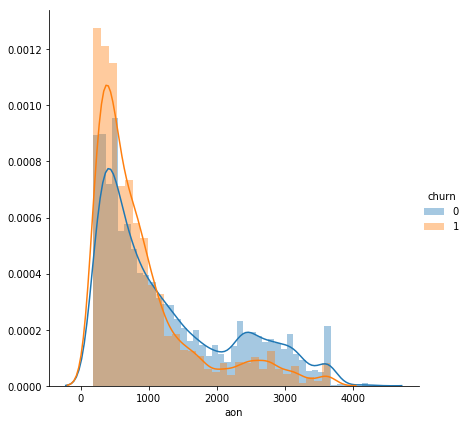

In [27]:
sns.FacetGrid(data_eda,hue='churn',size=6).map(sns.distplot,"aon").add_legend()

In [28]:
print("Mean:")
print(np.mean(df_not_churn["aon"]))
print(np.mean(df_churn["aon"]))
print("median:")
print(np.median(df_not_churn["aon"]))
print(np.median(df_churn["aon"]))

print("Quantiles:")
print(np.percentile(df_not_churn["aon"],np.arange(0,100,25)))
print(np.percentile(df_churn["aon"],np.arange(0,100,25)))

Mean:
1254.4881819533225
889.5733082706766
median:
899.0
637.0
Quantiles:
[180.000000 476.000000 899.000000 1884.000000]
[180.000000 375.000000 637.000000 1074.500000]


Univariate Analysis on 'total_mou_goodphase' and 'total_mou_actionphase'

In [29]:
data_eda['total_mou_goodphase']=data_eda['total_ic_mou_6']+data_eda['total_og_mou_6']+data_eda['total_ic_mou_7']+data_eda['total_og_mou_7']
data_eda['total_mou_actionphase']=data_eda['total_ic_mou_8']+data_eda['total_og_mou_8']

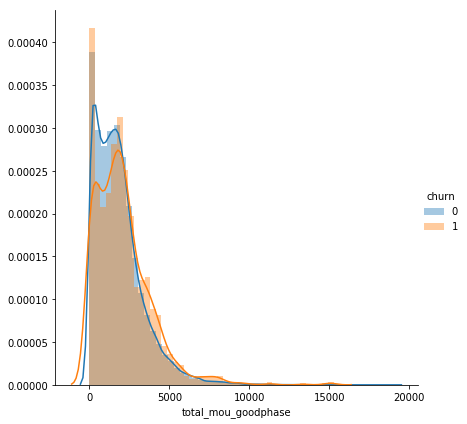

In [30]:
sns.FacetGrid(data_eda,hue='churn',size=6).map(sns.distplot,"total_mou_goodphase").add_legend()

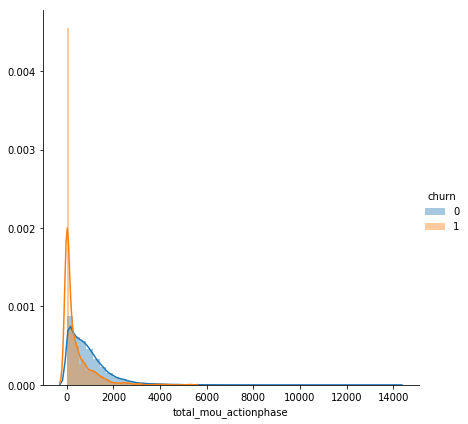

In [33]:
sns.FacetGrid(data_eda,hue='churn',size=6).map(sns.distplot,"total_mou_actionphase").add_legend()

Univariate Analysis on 'arpu'

In [35]:
#list of users whose arpu is greater than mean of that group in rupees
data_eda_new=data_eda.loc[((data_eda['arpu_6']> 282.9874) & ((data_eda['arpu_7']> 278.5366)) & (data_eda['arpu_8']> 279.1547)),:]
     

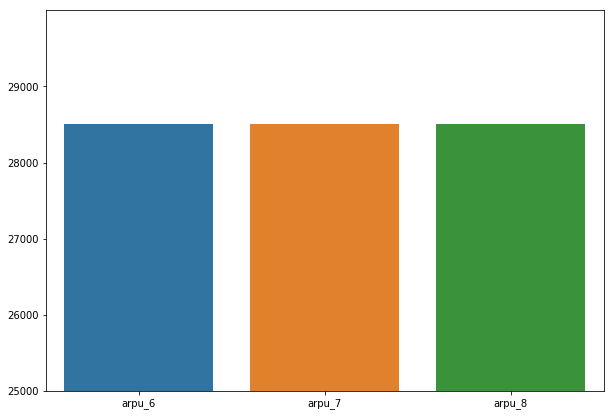

In [37]:
list_scores = [data_eda['arpu_6'].count(),data_eda['arpu_7'].count(),data_eda['arpu_8'].count()]
list_regressors = ['arpu_6','arpu_7','arpu_8']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
plt.ylim([25000, 30000])
plt.yticks(np.arange(25000, 30000, 1000))
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.show()

Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'

In [38]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))

Mean:
656.1418537237996
786.3007518796992
median:
564.0
669.0
Quantiles:
[0.000000 366.000000 564.000000 820.000000]
[0.000000 450.000000 669.000000 984.000000]


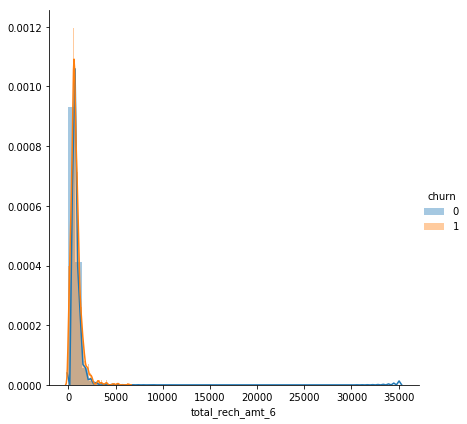

In [39]:
sns.FacetGrid(data_eda,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

In [40]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))

Mean:
668.5358257767207
733.1115288220551
median:
570.0
616.0
Quantiles:
[0.000000 366.000000 570.000000 833.000000]
[0.000000 382.750000 616.000000 939.250000]


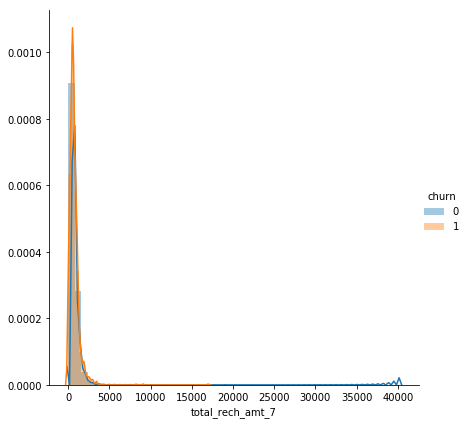

In [41]:
sns.FacetGrid(data_eda,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

In [42]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))

Mean:
619.713691095585
352.98809523809524
median:
518.0
190.0
Quantiles:
[0.000000 288.000000 518.000000 800.000000]
[0.000000 16.500000 190.000000 506.250000]


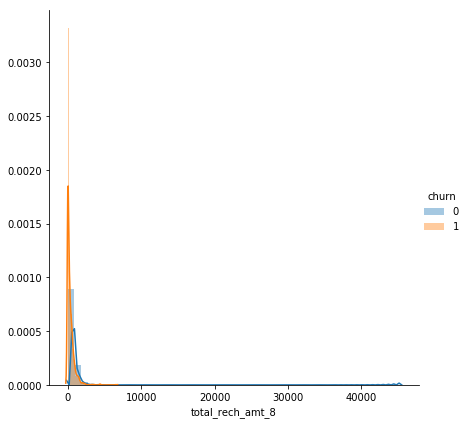

In [43]:
sns.FacetGrid(data_eda,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

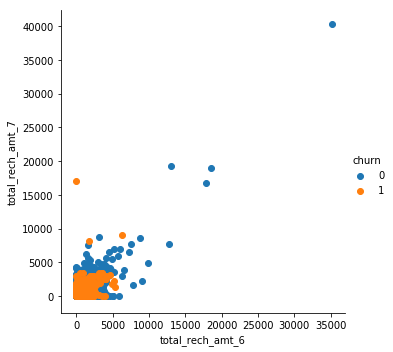

In [44]:
sns.FacetGrid(data_eda,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

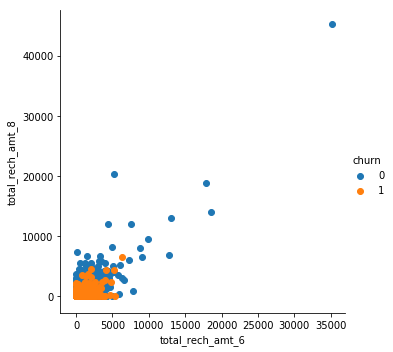

In [45]:
sns.FacetGrid(data_eda,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

Univariate Analysis on 'offnet' and 'onnet'

In [46]:
data_eda['onnet']=data_eda['onnet_mou_6']+data_eda['onnet_mou_7']+data_eda['onnet_mou_8']
data_eda['offnet']=data_eda['offnet_mou_6']+data_eda['offnet_mou_7']+data_eda['offnet_mou_8']

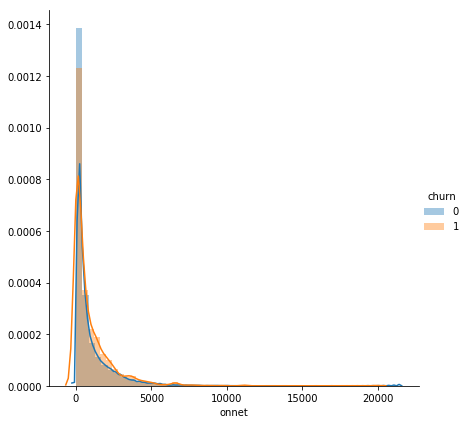

In [47]:
sns.FacetGrid(data_eda,hue='churn',size=6).map(sns.distplot,"onnet").add_legend()

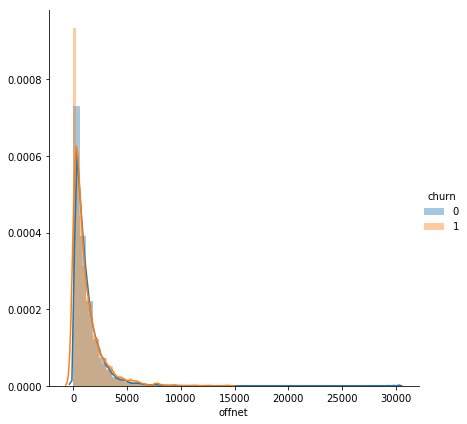

In [48]:
sns.FacetGrid(data_eda,hue='churn',size=6).map(sns.distplot,"offnet").add_legend()

Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
From univariate analysis some relationship is emerging to the churn, but no clear relationship found.
There are many highly correlated features, found 38 features with more then 0.8 correlation.

# Modelling (churn prediction) 

## 2.1 Class Imbalace Handling

In [49]:
#checking whether data is imbalanced or not
churn  = data["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

Total Churn Count     = 1596
Total Not-Churn Count = 26908
Churn Rate            = 5.60%


In [50]:
telecom = data
df_telecom = telecom.drop(['churn'], axis=1)
# Create X (independent variable) & y (dependent variable) 
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [51]:
#scaling of variables
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [52]:
#splitting of dataframes into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

X_train Dataframe Shape (19952, 140)
X_test Dataframe Shape (8552, 140)


In [53]:
#check for imbalance in the train and test sets

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


In [55]:
#applying Resampling on the dataset  

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
X_tes,Y_tes=sm.fit_sample(X_test,y_test)
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

X_tr Dataframe Shape (37666, 140)
y_tr Dataframe Shape (37666,)


In [56]:
#check for class imbalance

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

Imbalance in Train Data: 1.0


## 2.2 Modeling

### 2.2.2 PCA_LogesticRegression

In [64]:
pca = PCA(random_state=100)
pca.fit(X_tr)
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)
df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37666, 140)
(8552, 140)


In [65]:
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_tr)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [66]:
# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [67]:
print(confusion_matrix(y_test,y_pred))
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

[[6670 1405]
 [  91  386]]
LogisticRegression accuracy with PCA:  0.8250701590271281


In [69]:
colnames = list(df_telecom.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.1426,0.0656,0.0310,arpu_6
1,0.1499,0.0859,0.0160,arpu_7
2,0.1077,0.1320,-0.0050,arpu_8
3,0.1613,-0.0864,-0.0292,onnet_mou_6
4,0.1645,-0.0658,-0.0402,onnet_mou_7
5,0.1173,0.0005,-0.0433,onnet_mou_8
6,0.1781,0.0141,0.0238,offnet_mou_6
7,0.1884,0.0286,0.0122,offnet_mou_7
8,0.1234,0.0771,-0.0146,offnet_mou_8
9,0.0116,0.0058,0.1282,roam_ic_mou_6


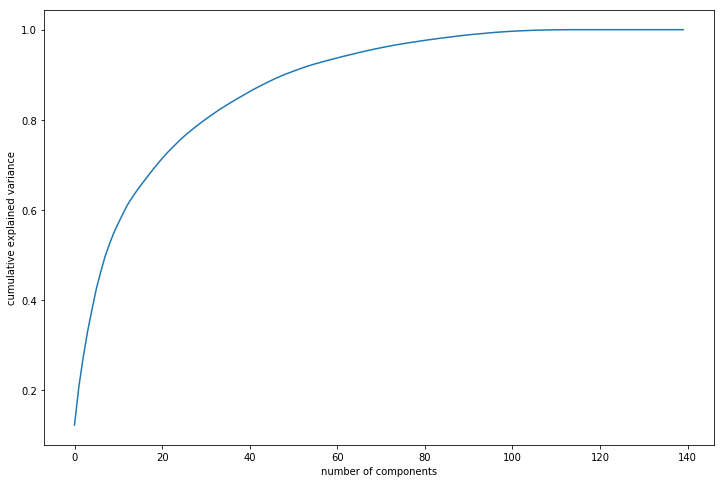

In [70]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [71]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.320000, 20.880000, 27.420000, 33.160000, 37.990000, 42.630000,
       46.340000, 49.760000, 52.520000, 55.020000, 57.090000, 59.080000,
       61.010000, 62.550000, 63.990000, 65.330000, 66.610000, 67.870000,
       69.120000, 70.310000, 71.440000, 72.530000, 73.550000, 74.510000,
       75.450000, 76.350000, 77.180000, 77.980000, 78.730000, 79.480000,
       80.190000, 80.890000, 81.580000, 82.240000, 82.870000, 83.470000,
       84.060000, 84.630000, 85.200000, 85.760000, 86.310000, 86.850000,
       87.360000, 87.850000, 88.330000, 88.800000, 89.260000, 89.680000,
       90.090000, 90.460000, 90.830000, 91.180000, 91.530000, 91.860000,
       92.160000, 92.440000, 92.710000, 92.980000, 93.240000, 93.500000,
       93.750000, 94.000000, 94.240000, 94.480000, 94.710000, 94.940000,
       95.170000, 95.390000, 95.610000, 95.810000, 96.010000, 96.210000,
       96.400000, 96.580000, 96.750000, 96.910000, 97.070000, 97.220000,
       97.370000, 97.520000, 97.660000, 97.800000, 

(37666, 140)
(8552, 140)
[[6670 1405]
 [  91  386]]
LogisticRegression accuracy with PCA:  0.8250701590271281


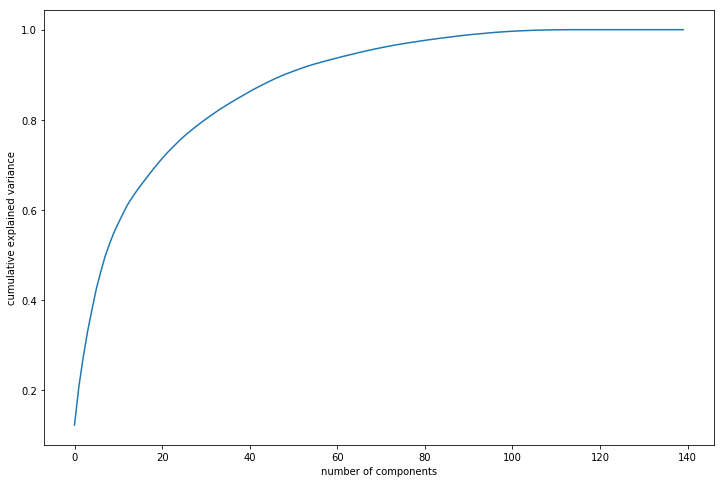

array([12.320000, 20.880000, 27.420000, 33.160000, 37.990000, 42.630000,
       46.340000, 49.760000, 52.520000, 55.020000, 57.090000, 59.080000,
       61.010000, 62.550000, 63.990000, 65.330000, 66.610000, 67.870000,
       69.120000, 70.310000, 71.440000, 72.530000, 73.550000, 74.510000,
       75.450000, 76.350000, 77.180000, 77.980000, 78.730000, 79.480000,
       80.190000, 80.890000, 81.580000, 82.240000, 82.870000, 83.470000,
       84.060000, 84.630000, 85.200000, 85.760000, 86.310000, 86.850000,
       87.360000, 87.850000, 88.330000, 88.800000, 89.260000, 89.680000,
       90.090000, 90.460000, 90.830000, 91.180000, 91.530000, 91.860000,
       92.160000, 92.440000, 92.710000, 92.980000, 93.240000, 93.500000,
       93.750000, 94.000000, 94.240000, 94.480000, 94.710000, 94.940000,
       95.170000, 95.390000, 95.610000, 95.810000, 96.010000, 96.210000,
       96.400000, 96.580000, 96.750000, 96.910000, 97.070000, 97.220000,
       97.370000, 97.520000, 97.660000, 97.800000, 

In [75]:
#Apply logistic regression with 48 columns(RANDOM STATE=45)

pca_45 = PCA(random_state=100)
pca_45.fit(X_tr)
df_train_pca = pca_45.fit_transform(X_tr)
print(df_train_pca.shape)
df_test_pca = pca_45.transform(X_test)
print(df_test_pca.shape)
logsk_45 = LogisticRegression(C=1e9)
logsk_45.fit(df_train_pca, y_tr)
# Predicted probabilities
y_pred = logsk_45.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
print(confusion_matrix(y_test,y_pred))
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))
colnames = list(df_telecom.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_45.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
np.cumsum(np.round(pca_45.explained_variance_ratio_, decimals=4)*100)
#Apply logistic regression with 48 columns(RANDOM STATE=45)




In [76]:
LogReg_PCA_45 = accuracy_score(y_test,y_pred)

### 2.2.3 LASSO_DecisionTree

In [78]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)

In [79]:
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)
X_train = X_lasso
y_train = y_tr
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

(37666, 35)
Features identified by LASSO for model buidling:  ['arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8', 'total_mou_goodphase', 'total_mou_actionphase']
Feature space holds 37666 observations and 35 features
Unique target labels: [0 1]


In [80]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

In [82]:
# Printing classification report
print(classification_report(y_test, y_pred_default))

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))



             precision    recall  f1-score   support

          0       0.98      0.87      0.92      8075
          1       0.24      0.67      0.35       477

avg / total       0.94      0.86      0.89      8552

[[7045 1030]
 [ 157  320]]
0.8612020579981291


In [83]:
# # Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# # Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# # Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   49.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [84]:
# # cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.6557,0.0591,0.0020,0.0011,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.8451,0.8742,0.8816,0.8735,0.8793,0.8707,0.0132,13,0.8769,0.8705,0.8704,0.8706,0.8692,0.8715,0.0027
1,0.5832,0.0171,0.0020,0.0011,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.8451,0.8742,0.8816,0.8735,0.8793,0.8707,0.0132,13,0.8769,0.8705,0.8704,0.8706,0.8692,0.8715,0.0027
2,0.5694,0.0276,0.0045,0.0056,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.8420,0.8685,0.8758,0.8708,0.8749,0.8664,0.0125,15,0.8732,0.8655,0.8663,0.8658,0.8661,0.8674,0.0029
3,0.5559,0.0134,0.0004,0.0008,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.8420,0.8685,0.8758,0.8708,0.8749,0.8664,0.0125,15,0.8732,0.8655,0.8663,0.8658,0.8661,0.8674,0.0029
4,0.8623,0.0181,0.0053,0.0052,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.8820,0.9153,0.9233,0.9152,0.9152,0.9102,0.0144,1,0.9261,0.9206,0.9199,0.9189,0.9176,0.9206,0.0029
5,0.8861,0.0555,0.0041,0.0059,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.8819,0.9153,0.9233,0.9145,0.9152,0.9100,0.0144,2,0.9261,0.9206,0.9199,0.9189,0.9176,0.9206,0.0029
6,0.8155,0.0129,0.0018,0.0010,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.8740,0.9040,0.9109,0.9108,0.9110,0.9022,0.0143,5,0.9157,0.9064,0.9055,0.9048,0.9067,0.9078,0.0040
7,0.8124,0.0157,0.0020,0.0011,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.8740,0.9040,0.9109,0.9108,0.9110,0.9022,0.0143,5,0.9157,0.9064,0.9055,0.9048,0.9067,0.9078,0.0040
8,0.3733,0.0035,0.0000,0.0000,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.8521,0.8715,0.8823,0.8779,0.8822,0.8732,0.0112,11,0.8844,0.8748,0.8776,0.8746,0.8759,0.8775,0.0036
9,0.4120,0.0213,0.0026,0.0005,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.8521,0.8715,0.8823,0.8779,0.8818,0.8731,0.0112,12,0.8844,0.8748,0.8776,0.8746,0.8759,0.8775,0.0036


In [85]:
# # printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9101842510486912
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [86]:
# # model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [87]:
# # accuracy score
print(clf_gini.score(X_test,y_test))
LASSO_DT=clf_gini.score(X_test,y_test)

0.8974508886810103


### 2.2.4 LASSO_RainForest

In [88]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)

In [89]:
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)
X_train = X_lasso
y_train = y_tr
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

(37666, 35)
Features identified by LASSO for model buidling:  ['arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8', 'total_mou_goodphase', 'total_mou_actionphase']
Feature space holds 37666 observations and 35 features
Unique target labels: [0 1]


In [90]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
#### Hyperparameter Tuning

# # Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10,20,30,40,50]
}
# # Create a based model
rf = RandomForestClassifier()
# # Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# # Fit the grid search to the data
grid_search.fit(X_train, y_train)
# # printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

LASSO_RF=grid_search.best_score_

# # model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)
# # fit
rfc.fit(X_train,y_train)
# # predict
predictions = rfc.predict(X_test)

# # evaluation metrics

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

## 2.3 Model evaluation

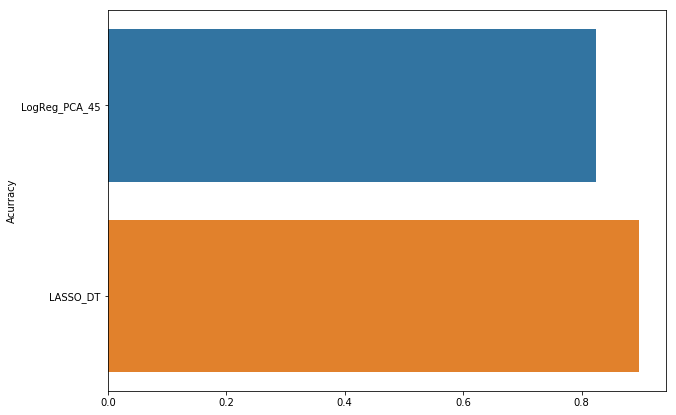

In [97]:
list_regressors = [LogReg_PCA_45,LASSO_DT]
list_scores = ['LogReg_PCA_45','LASSO_DT']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('Acurracy')
plt.show()

We can safely conclude that DecisionTree is the best model that fits the data and reduction with help of Lasso

# 3 Identifying important churn indicators and business recommendation 

In [98]:
 
s2 = set(lasso_features) 
pca_list=list(pcs_df.Feature)
s3 = set(pca_list) 
# Calculates intersection of sets on s1 and s2 
result_set = s3.intersection(s2)         
      


In [99]:
print(result_set)

{'monthly_3g_8', 'monthly_2g_7', 'arpu_7', 'sachet_2g_8', 'onnet_mou_6', 'roam_og_mou_8', 'last_day_rch_amt_8', 'total_ic_mou_8', 'aug_vbc_3g', 'roam_og_mou_7', 'std_og_mou_7', 'roam_ic_mou_7', 'sachet_3g_7', 'og_others_7', 'fb_user_8', 'total_mou_actionphase', 'sachet_2g_6', 'loc_og_t2f_mou_8', 'spl_ic_mou_8', 'vol_3g_mb_8', 'monthly_2g_8', 'vol_2g_mb_8', 'loc_og_t2m_mou_6', 'rech_days_left_8', 'total_rech_num_7', 'total_rech_num_8', 'rech_days_left_6', 'aon', 'monthly_2g_6', 'loc_ic_mou_8', 'loc_og_mou_8', 'vol_2g_mb_6', 'spl_og_mou_8', 'rech_days_left_7', 'total_mou_goodphase'}


Above Features are common in all feature reduction techniques applied and are most important.

columns having strong correlations can be sold as a pack to customer so as to not churn like low std and roaming calls,more types of sachet packages and good special plans